# Milestone 1 - Project Proposal

Personal Objective:

    Who: I am conducting this project to improve my skills in data analysis using Python and Pandas.
    What: I will analyze the NYSE dataset to extract meaningful insights regarding stock prices and company fundamentals.
    Why: My goal is to understand the patterns in stock market data and the impact of fundamental metrics on stock prices.
    How: I will achieve this by performing data cleaning, analysis, and visualization using Pandas and other Python libraries.

Intended Outcomes:

    I aim to develop a clear understanding of how fundamental and technical analysis can be applied using historical stock data.
    I plan to create a set of visualizations and statistical analyses that illustrate key findings.
    My goal is to generate insights that can potentially inform investment decisions or automated trading strategies.

Description of the Needs of the Intended Audience:

    Audience: The primary audience for my project includes data analysts, finance students, and stock market enthusiasts.
    Needs: My audience needs clear, actionable insights derived from the data, which can help in understanding market trends and making informed decisions.
    Format: I will present the results in a user-friendly format, including charts, graphs, and a written report explaining the findings.

Foreseeable Challenges:

    I anticipate potential data quality issues, such as missing or inconsistent entries.
    Merging different datasets (prices, fundamentals, securities) might be complex.
    Handling stock splits and other corporate actions in the data could be challenging.
    Interpreting the results and ensuring they are statistically significant and practically meaningful might be difficult.

# Milestone 2 - Data Import and Preparation

Description of the Dataset:

    Source: NYSE dataset on Kaggle - https://www.kaggle.com/datasets/dgawlik/nyse/data
    
    Files:
        prices.csv: Daily stock prices from 2010 to 2016.
        prices-split-adjusted.csv: Stock prices adjusted for splits.
        securities.csv: Company descriptions and sector information.
        fundamentals.csv: Financial metrics from SEC 10K filings (2012-2016).
    Content: The dataset includes raw and adjusted stock prices, company descriptions, and fundamental financial metrics.

Foreseeable Challenges:

    Importing Issues: Large file sizes might lead to memory errors or slow processing times. Ensuring all files are correctly loaded into Python.
    Datafile Restrictions: Understanding the structure and format of each file, especially handling different date ranges and missing values.
    Data Cleaning: Identifying and correcting errors, dealing with stock splits, and ensuring consistency across datasets.
    Analysis Preparation: Merging datasets accurately, creating new metrics, and setting up the data for meaningful analysis.

In [2]:
# Importing data

import pandas as pd

prices = pd.read_csv('prices.csv')
prices_adjusted = pd.read_csv('prices-split-adjusted.csv')
securities = pd.read_csv('securities.csv')
fundamentals = pd.read_csv('fundamentals.csv')

# Milestone 3

In [3]:
# Data Cleaning

# Check for missing values
print("Missing values in prices:\n", prices.isnull().sum())
print("Missing values in prices_adjusted:\n", prices_adjusted.isnull().sum())
print("Missing values in securities:\n", securities.isnull().sum())
print("Missing values in fundamentals:\n", fundamentals.isnull().sum())

Missing values in prices:
 date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
Missing values in prices_adjusted:
 date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
Missing values in securities:
 Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64
Missing values in fundamentals:
 Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int

In [4]:
# Handle missing values
prices.dropna(inplace=True)
prices_adjusted.dropna(inplace=True)
securities.dropna(inplace=True)
fundamentals.dropna(inplace=True)

In [7]:
# Ensure data types are correct
# Convert 'date' columns to datetime with error handling

prices['date'] = pd.to_datetime(prices['date'], format='%Y-%m-%d', errors='coerce')
prices_adjusted['date'] = pd.to_datetime(prices_adjusted['date'], format='%Y-%m-%d', errors='coerce')
fundamentals['Period Ending'] = pd.to_datetime(fundamentals['Period Ending'], format='%Y-%m-%d', errors='coerce')

In [8]:
# Check for any remaining NaT values in date columns after conversion
print("NaT values in prices['date']:\n", prices['date'].isna().sum())
print("NaT values in prices_adjusted['date']:\n", prices_adjusted['date'].isna().sum())
print("NaT values in fundamentals['Period Ending']:\n", fundamentals['Period Ending'].isna().sum())

NaT values in prices['date']:
 2139
NaT values in prices_adjusted['date']:
 0
NaT values in fundamentals['Period Ending']:
 0


In [9]:
# Checking the cleaned data
print(prices.info())
print(prices_adjusted.info())
print(securities.info())
print(fundamentals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    849125 non-null  datetime64[ns]
 1   symbol  851264 non-null  object        
 2   open    851264 non-null  float64       
 3   close   851264 non-null  float64       
 4   low     851264 non-null  float64       
 5   high    851264 non-null  float64       
 6   volume  851264 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 45.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   symbol  851264 non-null  object        
 2   open    851264 non-null  float64       
 3   close   851264 non-null  float64       
 4   low     851264 non-null

In [14]:
#Data Merging

# Merge prices and fundamentals on the ticker symbol
merged_data = pd.merge(prices, fundamentals, how='inner', left_on='symbol', right_on='Ticker Symbol')

# Incorporate company descriptions from securities.csv
merged_data = pd.merge(merged_data, securities, how='inner', left_on='symbol', right_on='Ticker symbol')

# Drop duplicate columns after merging
merged_data.drop(columns=['Ticker Symbol', 'Ticker symbol'], inplace=True)

# Check the result
print(merged_data.head())

        date symbol       open      close        low       high     volume  \
0 2010-01-04    AAL   4.840000   4.770000   4.660000   4.940000  9837300.0   
1 2010-01-04    AAL   4.840000   4.770000   4.660000   4.940000  9837300.0   
2 2010-01-04    AAL   4.840000   4.770000   4.660000   4.940000  9837300.0   
3 2010-01-04    AAL   4.840000   4.770000   4.660000   4.940000  9837300.0   
4 2010-01-04    AAP  40.700001  40.380001  40.360001  41.040001  1701700.0   

   Unnamed: 0 Period Ending  Accounts Payable  ...  For Year  \
0           0    2012-12-31      3.068000e+09  ...    2012.0   
1           1    2013-12-31      4.975000e+09  ...    2013.0   
2           2    2014-12-31      4.668000e+09  ...    2014.0   
3           3    2015-12-31      5.102000e+09  ...    2015.0   
4           4    2012-12-29      2.409453e+09  ...    2012.0   

   Earnings Per Share  Estimated Shares Outstanding                 Security  \
0               -5.60                  3.350000e+08  American Airl

                                date          open         close  \
count                        1368010  1.368010e+06  1.368010e+06   
mean   2013-07-26 14:14:10.804306688  7.667859e+01  7.670136e+01   
min              2010-01-04 00:00:00  8.500000e-01  8.600000e-01   
25%              2011-10-27 00:00:00  3.628000e+01  3.629000e+01   
50%              2013-08-13 00:00:00  5.552995e+01  5.555000e+01   
75%              2015-04-27 00:00:00  8.446000e+01  8.449000e+01   
max              2016-12-30 00:00:00  1.584440e+03  1.578130e+03   
std                              NaN  9.361853e+01  9.361963e+01   

                low          high        volume    Unnamed: 0  \
count  1.368010e+06  1.368010e+06  1.368010e+06  1.368010e+06   
mean   7.586305e+01  7.748201e+01  4.824849e+06  8.902433e+02   
min    8.300000e-01  8.800000e-01  0.000000e+00  0.000000e+00   
25%    3.589000e+01  3.668000e+01  1.009800e+06  4.910000e+02   
50%    5.495000e+01  5.611000e+01  1.997000e+06  8.750000e+02 

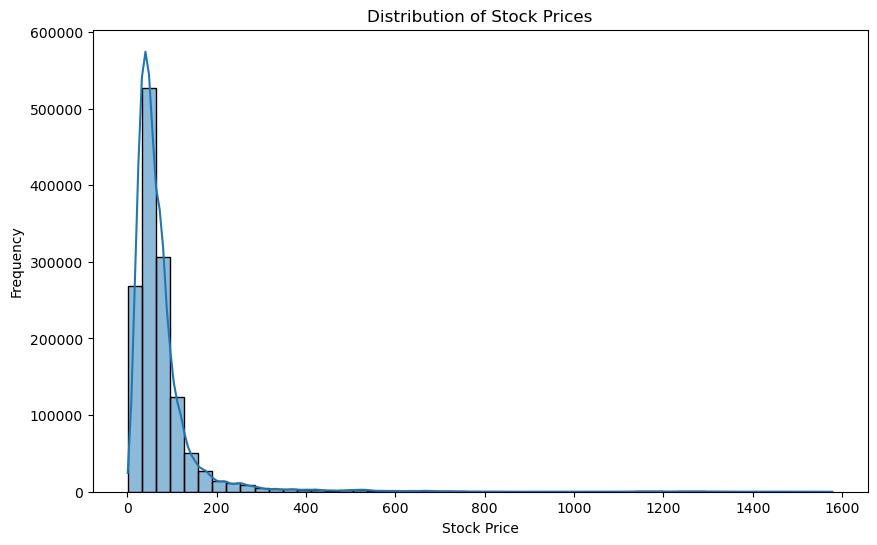

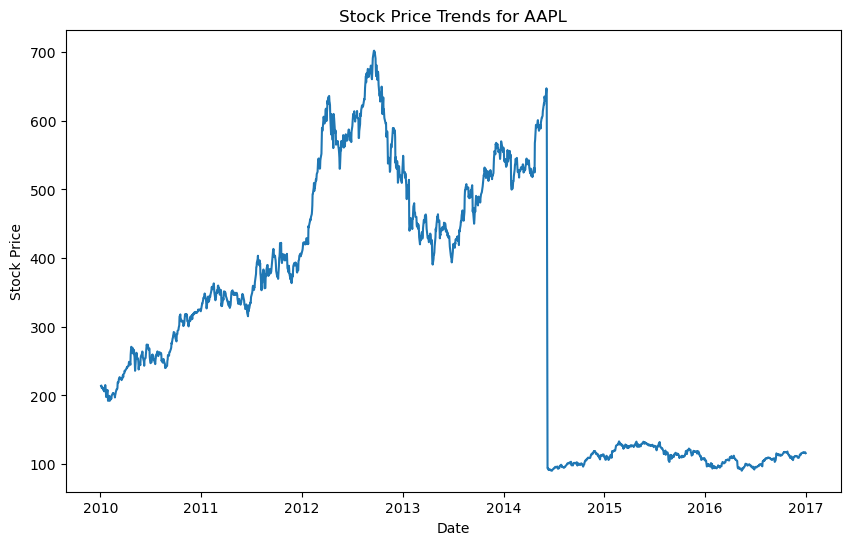

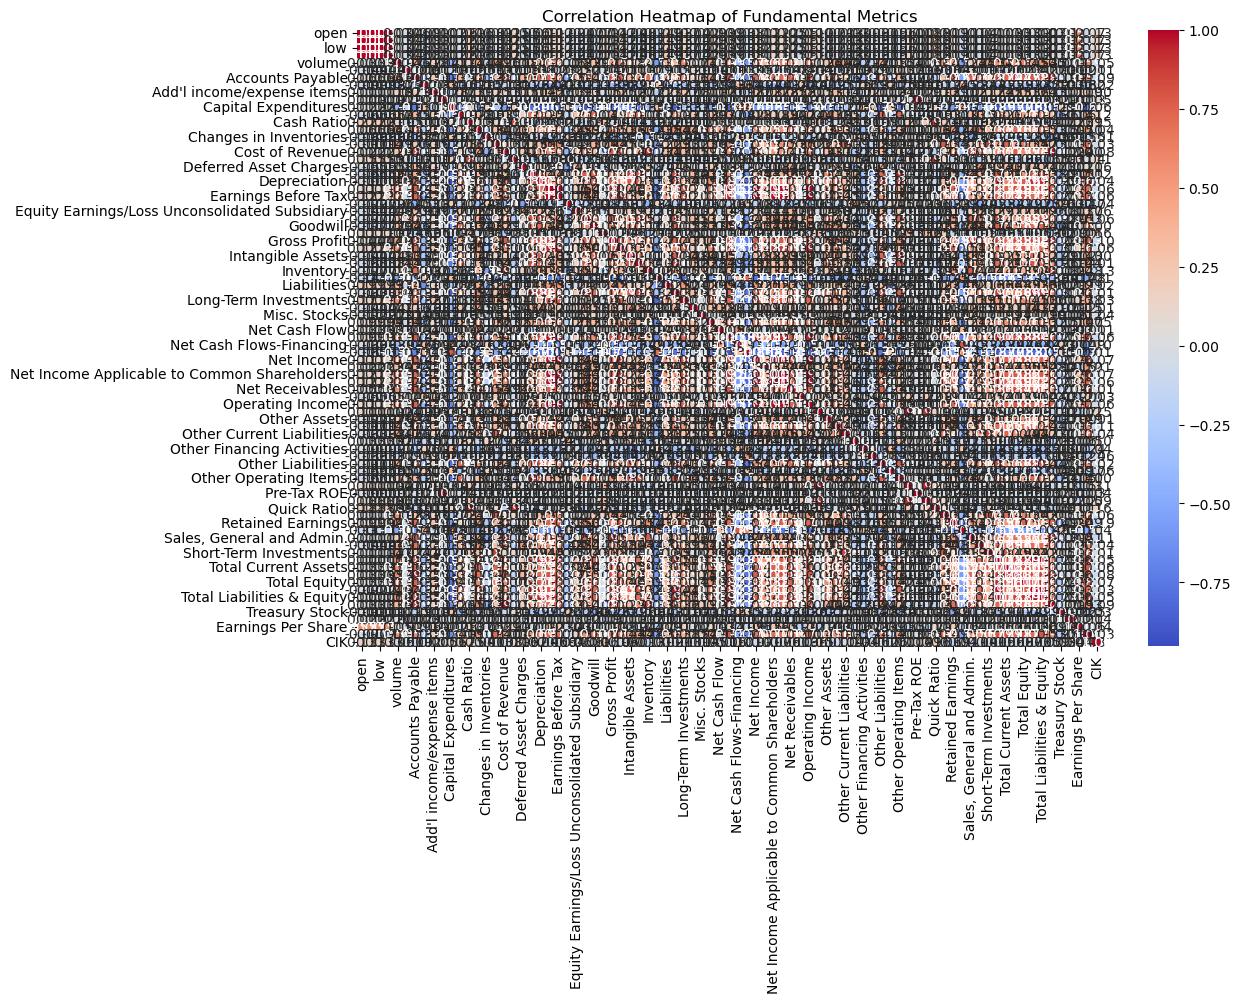

In [19]:
#Exploratory data Anlysis
import matplotlib.pyplot as plt
import seaborn as sns

# Generate summary statistics
print(merged_data.describe())

# Create visualizations to understand data distributions and relationships
# Example 1: Distribution of stock prices
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['close'], bins=50, kde=True)
plt.title('Distribution of Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.show()

# Example 2: Stock price trends over time for a specific ticker
ticker = 'AAPL'  # Example ticker
apple_data = merged_data[merged_data['symbol'] == ticker]

plt.figure(figsize=(10, 6))
plt.plot(apple_data['date'], apple_data['close'])
plt.title('Stock Price Trends for ' + ticker)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# Example 3: Correlation heatmap of fundamental metrics
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
corr = merged_data[numeric_columns].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Fundamental Metrics')
plt.show()

# Milestone 4

In [20]:
# Calculate skewness for relevant columns
skew_values = merged_data[['close', 'volume', 'Total Revenue']].skew()
print("Skewness of selected columns:\n", skew_values)

Skewness of selected columns:
 close             6.926472
volume           11.002690
Total Revenue     7.131448
dtype: float64


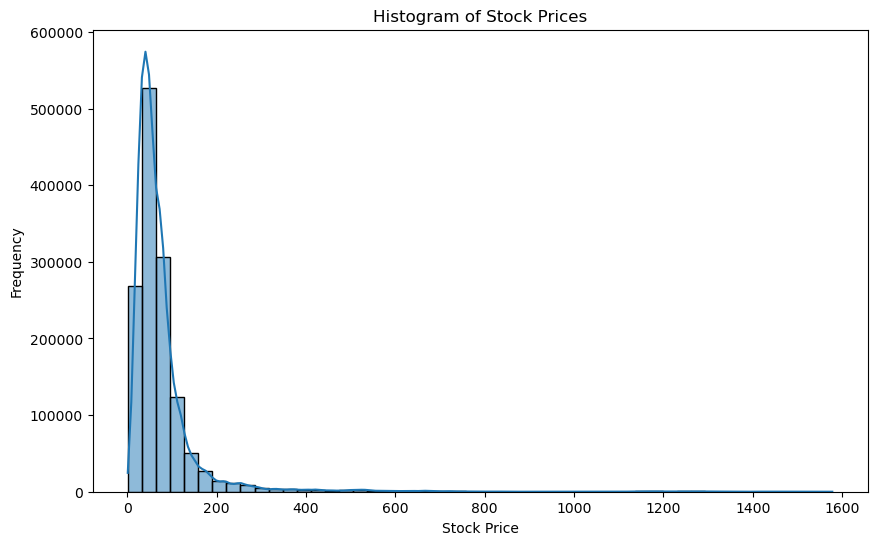

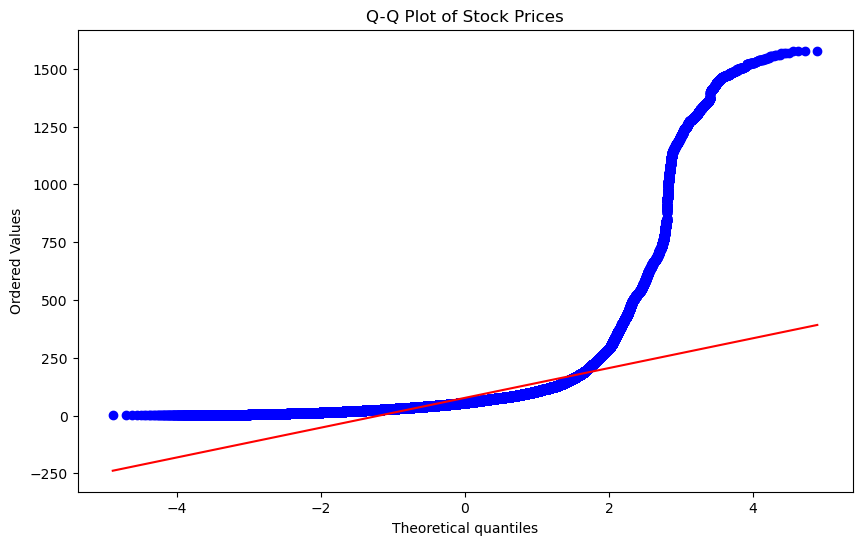

In [21]:
import scipy.stats as stats

# Example: Histogram for 'close' prices
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['close'], bins=50, kde=True)
plt.title('Histogram of Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.show()

# Example: Q-Q plot for 'close' prices
plt.figure(figsize=(10, 6))
stats.probplot(merged_data['close'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Stock Prices')
plt.show()

Skewness after log transformation:
 0.22868147606345413


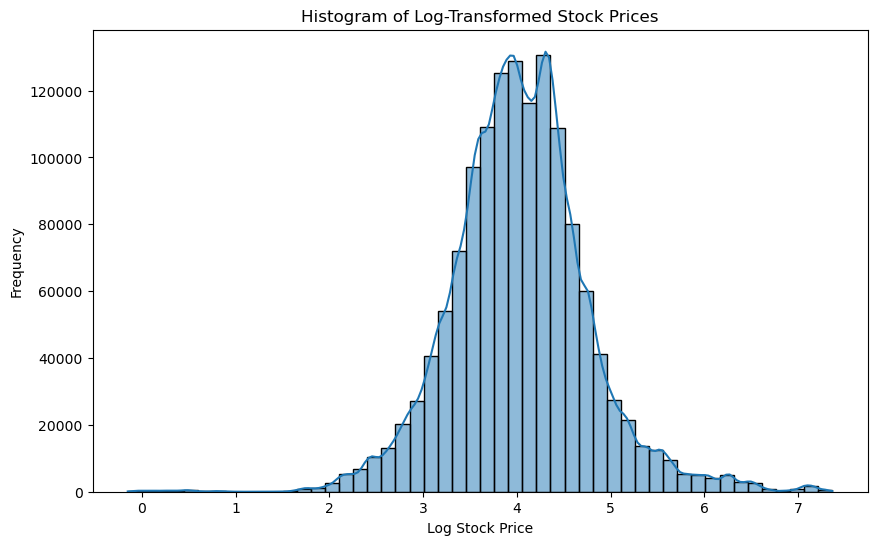

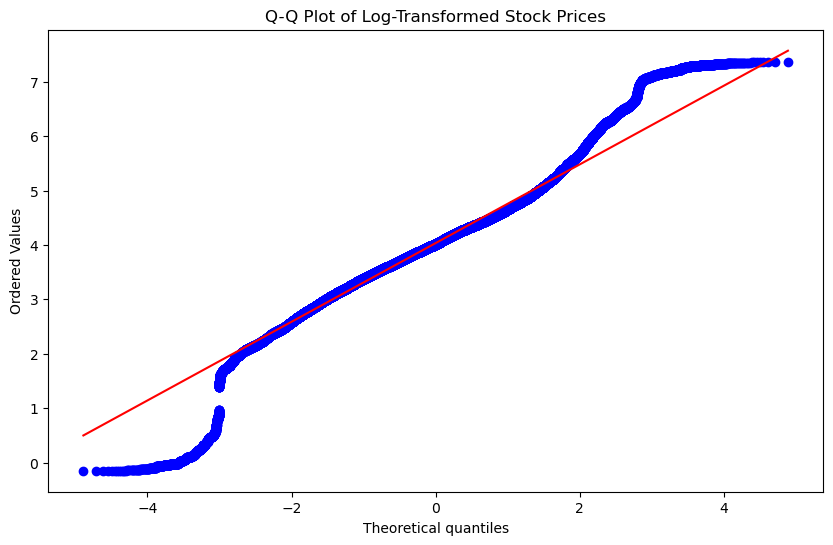

In [23]:
# Example: Log transformation for 'close' prices'
import numpy as np
merged_data['log_close'] = np.log(merged_data['close'].replace(0, np.nan))  # Replace 0s to avoid log(0) issues

# Check skewness after transformation
log_skew_values = merged_data['log_close'].skew()
print("Skewness after log transformation:\n", log_skew_values)

# Histogram and Q-Q plot after transformation
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['log_close'].dropna(), bins=50, kde=True)
plt.title('Histogram of Log-Transformed Stock Prices')
plt.xlabel('Log Stock Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(merged_data['log_close'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Stock Prices')
plt.show()

In [ ]:
# Save the cleaned and transformed DataFrame to a CSV file
merged_data.to_csv('transformed_merged_data.csv', index=False)

In [4]:
print(head(transformed_merged_data.csv)

NameError: name 'head' is not defined